In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Definiendo los parámetros físicos del problema
x0 = 0                          # x inicial (m)
xF = 50                         # x final (m)
D = 0.4                         # Coeficiente de difusividad (m2/s)
Cini = 200                      # Concentración inicial (mg/L)
t0 = 0                          # Tiempo inicial (s)
tf = 300                        # Tiempo final (s)

# Definición de los parámetros numéricos
dx = 2.5                        # Distancia entre nodos (m)
S = 0.25                        # Parámetro de estabilidad
k = 10                          # Cada cuántos pasos de tiempo se guarda

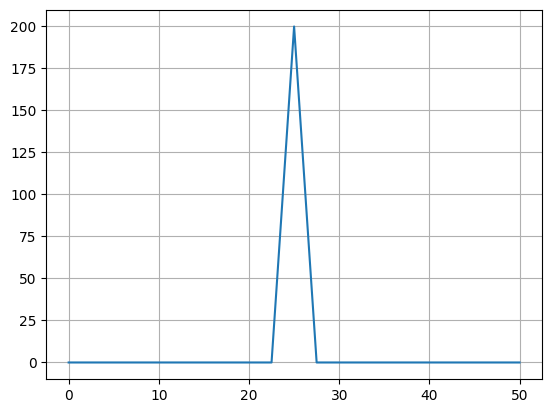

In [69]:
# Vector de posiciones de los nodos
nodos = int((xF - x0) / dx + 1)
X = np.linspace(x0, xF, nodos)

C0 = np.zeros_like(X)
C0[int(len(X) / 2)] = Cini

plt.plot(X, C0)
plt.grid()

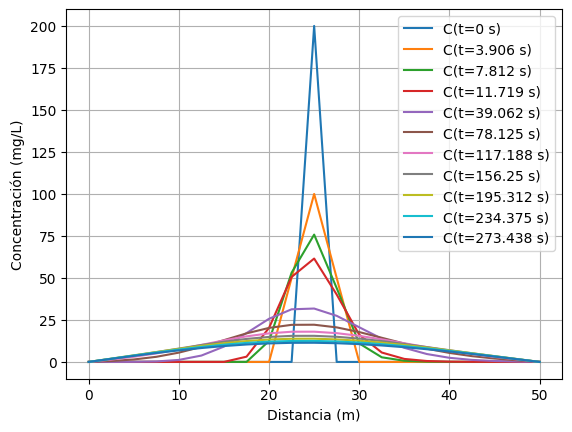

In [70]:
# Declarando un dataframe para guardar los valores de la concentración en 
# determinados pasos de tiempo
Explicito = pd.DataFrame({'X (m)': X,
                          'C(t=0 s)': C0})

# Calculando el delta de tiempo
dt = (S * dx ** 2 / D)
T = np.arange(t0, tf + 1, dt)

# Declarar un vector de la concentración pero en el paso siguiente: 
C1 = np.empty_like(C0)

# Crear la figura para ir graficando
fig, ax = plt.subplots()
ax.plot(X, C0, label='C(t=0 s)')

# Iterar en el tiempo
for t in range(1, len(T) - 1):

    # Imponer las condiciones de contorno
    C1[0] = 0
    C1[-1] = 0

    # Calcular los valores de C1 internos
    for i in range(1, len(C0) - 1):

        C1[i] = S * (C0[i + 1] + C0[i -1]) + (1 - 2 * S) * C0[i]

    # Revisando si hay que guardar información o graficar
    if t % k == 0 or t <= 3: 

        # Creando nombre de columna y almacenando en dataframe
        nombre = 'C(t=' + str(round(T[t], 3)) + ' s)'
        Explicito[nombre] = C1

        # Graficando
        ax.plot(X, C1, label=nombre)

    # Reemplazando los valores para seguir iterando
    C0 = C1

# Imprimiendo el dataframe
Explicito

# Poniendo bonito el gráfico
ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Concentración (mg/L)')
ax.grid()
ax.legend()

Text(0, 0.5, 'Concentración (mg/L)')

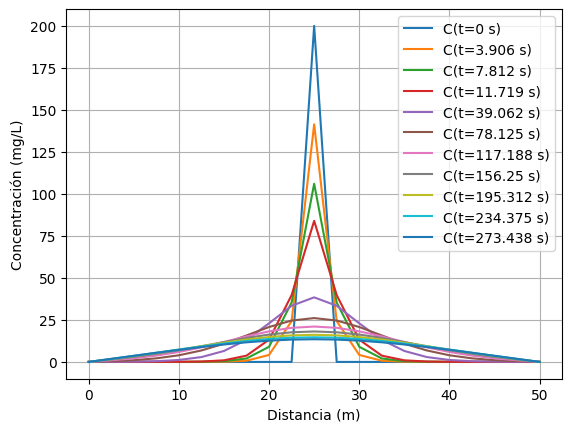

In [71]:
# Método implícito de solución

# Declarando de nuevo la concentración inicial
C0 = np.zeros_like(X)
C0[int(len(X) / 2)] = Cini
C1 = np.empty_like(C0)

# Graficando la condición inicial y dejando abierta la figura
fig, ax = plt.subplots()

ax.plot(X, C0, label='C(t=0 s)')
ax.grid()

# Armando el dataframe para almacenar la solución del problema
Implicita = pd.DataFrame({'x(m)': X,
                          'C(t=0 s)': C0})

# Armando la matriz de rigidez del problema
A = np.zeros((nodos, nodos))
A[0, 0] = 1
A[-1, -1] = 1

# Recorriendo las filas para el llenado de la matriz
for j in range(1, len(A) - 1):

    A[j, j] = 1 + 2 * S
    A[j, j - 1] = -S
    A[j, j + 1] = -S

# Para ver la estructura de la matriz puede usar
# plt.spy(A)

# Iterando en el tiempo para hallar la solución de la matriz
for t in range(1, len(T)):

    # Imponiendo la condición de frontera
    C0[0] = 0
    C0[-1] = 0

    # Resoviendo el sistema en el paso de tiempo
    C1 = np.linalg.solve(A, C0)

    # Revisando si los datos se deben guardar o no
    if t % k == 0 or t <= 3:

        # Generando el nombre de la columna
        nombre = 'C(t=' + str(round(T[t], 3)) + ' s)'
        Implicita[nombre] = C1

        # Graficando la solución
        ax.plot(X, C1, label=nombre)

    # Reemplazando valores para seguir iterando
    C0 = C1

# Imprimiendo el dataframe 
Implicita

# Arreglando la gráfica
ax.legend()
ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Concentración (mg/L)')